In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

In [21]:
df = pd.read_csv('compare.csv')

y_true = df['gemini_score']       
y_pred = df['similarity_score']   

total = len(df)                   

# Calculate error metrics
mae = mean_absolute_error(y_true, y_pred)           # Mean Absolute Error: avg absolute difference
mse = mean_squared_error(y_true, y_pred)            # Mean Squared Error: avg squared difference
pearson_corr, pearson_p = pearsonr(y_true, y_pred)  # Pearson: measures linear correlation

# Percentage of predictions within ±2 points of true value
within_2 = ((y_true - y_pred).abs() <= 2).mean() * 100  # Proportion within tolerance

# Print results
print(f"Totale record      : {total}")
print(f"MAE                : {mae:.3f}")
print(f"MSE                : {mse:.3f}")
print(f"Pearson corr       : {pearson_corr:.3f}")
print(f"% entro ±2 punto   : {within_2:.1f}%")

Totale record      : 3310
MAE                : 1.541
MSE                : 4.146
Pearson corr       : 0.623
% entro ±2 punto   : 75.9%


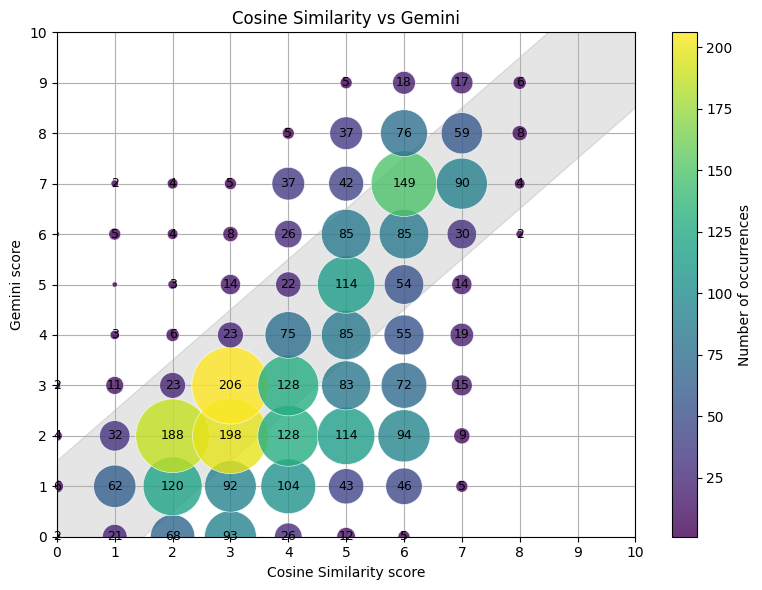

In [19]:
grouped = df.groupby(['similarity_score', 'gemini_score']).size().reset_index(name='counts')

# Prepare bisector band (±1.5)
x_vals = range(0, 11)
y_lower = [x - 1.5 for x in x_vals]
y_upper = [x + 1.5 for x in x_vals]

plt.figure(figsize=(8, 6))

# Background tolerance band
plt.fill_between(x_vals, y_lower, y_upper, alpha=0.2, color='grey', zorder=1)

# Scatter plot with color mapped to frequency
sc = plt.scatter(
    grouped['similarity_score'],
    grouped['gemini_score'],
    s=grouped['counts'] * 15,
    c=grouped['counts'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='w',
    linewidth=0.5,
    zorder=2
)

# Colorbar to interpret frequencies
cbar = plt.colorbar(sc)
cbar.set_label('Number of occurrences')

# Add count labels for points with more than 1 occurrence
for _, row in grouped.iterrows():
    if row['counts'] > 1:
        plt.text(row['similarity_score'],
                 row['gemini_score'],
                 int(row['counts']),
                 fontsize=9, ha='center', va='center', zorder=3)

# Axis settings
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))

plt.xlabel('Cosine Similarity score')
plt.ylabel('Gemini score')
plt.title('Cosine Similarity vs Gemini')
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()